In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import re
import nltk
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,Activation,Embedding,LSTM, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

# from keras.utils import np_utils
# from keras import backend as K
# import keras.backend.tensorflow_backend as tfback
# K.common.set_image_dim_ordering("th")
# seed = 7

# def _get_available_gpus():  

#     if tfback._LOCAL_DEVICES is None:  
#         devices = tf.config.list_logical_devices()  
#         tfback._LOCAL_DEVICES = [x.name for x in devices]  
#     return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]

# tfback._get_available_gpus = _get_available_gpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\K2\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\k2\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ff81544752203f2a824ae59b942eb55dd2915a9efdb65da77f6129fb811dcb04
  Stored in directory: c:\users\k2\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=3c477847c46b8652031515f2ba4c0049a2f74d2fcc81e0efcce7fffae04fd889
  Stored in directory: c:\users\k2\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


# Pre-processing

In [20]:
df = pd.read_excel("training_data_new.xlsx")
df = df[['Content', 'Label']]
df = df.dropna()
dic = {'positive':1, 'negative':0, 'ngative':0, 'positive ':1, 'positve':1,
       'negative ':0, 'postive':1, 'Negative':0, 'Positive':1, 1:1, 0:0}
df['Label'] = df.Label.apply(lambda x : dic[x])
df

,Content,Label
0,\n\n\n\n\n\nExxact Announces GPU-Accelerated ...,1
1,\n\n\n\n\n\nHelix Reports Second Quarter 2009 ...,0
2,\n\n\n\n\n\nPharmerit Expands Market Access Su...,0
3,\n\n\n\n\n\nMeredith Invests In Future Of Vide...,1
4,\n\n\n\n\n\nNet Lease REITs Becoming More Proa...,0
...,...,...
4995,\n\n\n\n\n\nPress Release: ThreeD Capital Inc....,0
4996,\n\n\n\n\n\nroOomy(R) Unveils App for iPhone\n...,0
4997,\n\n\n\n\n\nPress Release: Workhorse Group Sig...,1
4998,"\n\n\n\n\n\nDigital Bots Market Size Worth $5,...",0


In [21]:
# negetive/positive ratio  
sum(df.Label==0)/sum(df.Label == 1)

1.926813880126183

In [24]:
df[df.Label==0]

,Content,Label
1,\n\n\n\n\n\nHelix Reports Second Quarter 2009 ...,0
2,\n\n\n\n\n\nPharmerit Expands Market Access Su...,0
4,\n\n\n\n\n\nNet Lease REITs Becoming More Proa...,0
6,\n\n\n\n\n\nORBCOMM To Host First Quarter 2016...,0
7,\n\n\n\nEXCHANGE --- Markets News -- Commoditi...,0
...,...,...
4994,\n\n\n\n\n\nPress Release: Silicon Labs to Pre...,0
4995,\n\n\n\n\n\nPress Release: ThreeD Capital Inc....,0
4996,\n\n\n\n\n\nroOomy(R) Unveils App for iPhone\n...,0
4998,"\n\n\n\n\n\nDigital Bots Market Size Worth $5,...",0


In [25]:
# up-sampling 
df = pd.concat([df,df[df.Label == 1].sample(n = 1469)]) #(3054-1585)
sum(df.Label==0)/sum(df.Label == 1)

1.0

In [26]:
doc = df.Content
target = df.Label

In [27]:
# data glance
doc

0       \n\n\n\n\n\nExxact Announces GPU-Accelerated  ...
1       \n\n\n\n\n\nHelix Reports Second Quarter 2009 ...
2       \n\n\n\n\n\nPharmerit Expands Market Access Su...
3       \n\n\n\n\n\nMeredith Invests In Future Of Vide...
4       \n\n\n\n\n\nNet Lease REITs Becoming More Proa...
                              ...                        
3928    \n\n\n\n\n\nNews Highlights: Top Company News ...
4831    \n\n\n\nCubic Completes Acquisition of Intific...
4064    \n\n\n\n\n\nJustice League VR: The Complete Ex...
3989    \n\n\n\n\n\nRed Lion Appoints New Executives t...
4258    \n\n\n\n\n\nThe mass flow controller market is...
Name: Content, Length: 6108, dtype: object

In [28]:
# Missing values
df.Content.isnull().sum()

0

In [29]:
# negetive/positive ratio  
sum(target==0)/sum(target == 1)

1.0

In [30]:
#tokenizing function -- removing punctuation and English stop words 
stop_words = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
def tokenizing (text):
    clean_text = re.sub(r'\d+','',text.lower())
    clean_text = re.sub(r'\n', ' ', clean_text)
    token = tokenizer.tokenize(clean_text)
    clean_token  = []
    for i in token:
        if i not in stop_words and len(i)>2:
            clean_token.append(i)
    return clean_token

In [31]:
#stemming function
def stemming(text):
    new_text = []
    for i in text:
        new_text.append(PorterStemmer().stem(i))
    return new_text

In [32]:
doc = doc.map(tokenizing)
doc

0       [exxact, announces, gpu, accelerated, deep, le...
1       [helix, reports, second, quarter, results, wor...
2       [pharmerit, expands, market, access, support, ...
3       [meredith, invests, future, video, technology,...
4       [net, lease, reits, becoming, proactive, asset...
                              ...                        
3928    [news, highlights, top, company, news, day, wo...
4831    [cubic, completes, acquisition, intific, inc, ...
4064    [justice, league, complete, experience, allows...
3989    [red, lion, appoints, new, executives, support...
4258    [mass, flow, controller, market, expected, gro...
Name: Content, Length: 6108, dtype: object

In [33]:
doc = doc.map(stemming)
doc

0       [exxact, announc, gpu, acceler, deep, learn, i...
1       [helix, report, second, quarter, result, word,...
2       [pharmerit, expand, market, access, support, a...
3       [meredith, invest, futur, video, technolog, po...
4       [net, leas, reit, becom, proactiv, asset, mana...
                              ...                        
3928    [news, highlight, top, compani, news, day, wor...
4831    [cubic, complet, acquisit, intif, inc, strengt...
4064    [justic, leagu, complet, experi, allow, user, ...
3989    [red, lion, appoint, new, execut, support, cus...
4258    [mass, flow, control, market, expect, grow, ca...
Name: Content, Length: 6108, dtype: object

In [34]:
target

0       1
1       0
2       0
3       1
4       0
       ..
3928    1
4831    1
4064    1
3989    1
4258    1
Name: Label, Length: 6108, dtype: int64

In [77]:
# sb = doc.apply(lambda x: " ".join(x) )
# target
# dsb = pd.merge(sb,target,right_index=True, left_index =True)
# dsb.columns = ['body', 'fake']
# dsb.to_csv('train_for_fun.csv')

In [35]:
# split train test 
X_train, X_test, y_train, y_test = train_test_split(doc,target,train_size=0.85,random_state = 300)

In [36]:
X_train

2026    [global, industri, robot, market, reach, billi...
726     [counterflow, appoint, former, fireey, execut,...
541     [twilio, bring, cloud, commun, window, azur, m...
3029    [embed, world, word, march, newswir, prn, engl...
121     [tavant, technolog, recogn, top, mortgag, tech...
                              ...                        
1749    [intuit, surgic, new, robot, system, get, fda,...
1492    [interact, intellig, receiv, product, year, aw...
4321    [stratacach, display, passeng, engag, solut, a...
3326    [satisfi, lab, tap, jonathon, scott, head, pro...
1233    [game, product, servic, acaji, new, name, new,...
Name: Content, Length: 5191, dtype: object

In [37]:
# Vectorizer
X_train = X_train.apply(lambda x: " ".join(x) )
X_test = X_test.apply(lambda x: " ".join(x) )
cv = CountVectorizer(binary=True,token_pattern=r'\b[^\d\W]+\b')
cv.fit(X_train)
X_train_vec = cv.transform(X_train)
X_test_vec = cv.transform(X_test)

In [38]:
X_train_vec

<5191x56846 sparse matrix of type '<class 'numpy.int64'>'
	with 1400442 stored elements in Compressed Sparse Row format>

In [ ]:
#Do not run machine learning model on sparse matrix. 
#https://medium.com/@paritosh_30025/natural-language-processing-text-data-vectorization-af2520529cf7

# Logistic Regression

In [39]:
print("%4s %4s %4s %4s %4s" %('C','Accuracy','Precision','Recall','F1Score'))
for c in [0.01, 0.05, 0.25, 0.5, 1, 1.25, 1.5, 2, 3]:
    lr = LogisticRegression(C=c,class_weight='balanced', max_iter=1000)
    lr.fit(X_train_vec,y_train)
    y_predict = lr.predict(X_test_vec)
    accuracy = round(accuracy_score(y_test, y_predict)*100,1)
    precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
    recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
    F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
    print("%4s %7s%% %8s%% %5s%% %6s%%" %(c,accuracy,precision,recall,F1Score))

   C Accuracy Precision Recall F1Score
0.01    72.1%     72.3%  72.2%   72.1%
0.05    79.2%     79.7%  79.3%   79.1%
0.25    81.9%     82.8%  82.1%   81.8%
 0.5    82.2%     83.1%  82.4%   82.2%
   1    82.3%     83.2%  82.5%   82.3%
1.25    82.2%     83.1%  82.4%   82.2%
 1.5    82.7%     83.4%  82.8%   82.6%
   2    82.9%     83.6%  83.0%   82.8%
   3    82.9%     83.6%  83.0%   82.8%


# XGB

In [40]:
import xgboost as xgb

In [41]:
%%time
#tuning subsample colsample_bytree
cv_params = {'subsample': [ 0.9, 1.0, 1.1, 1.2], 'colsample_bytree': [ 0.9, 1.0, 1.1, 1.2]}
other_params = {"n_estimators":100, "max_depth":8, "learning_rate":0.1, "subsample":0.5, "colsample_bytree": 0.8}
xgb = xgb.XGBClassifier(**other_params)
opt_xgb = GridSearchCV(estimator = xgb, param_grid = cv_params, scoring="f1_macro", cv=5, verbose=1, n_jobs=4)
opt_xgb.fit(X_train_vec, y_train)
opt_xgb.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:  4.7min finished


Wall time: 5min 5s


{'colsample_bytree': 1.0, 'subsample': 1.0}

In [31]:
%%time
#tuning learning_rate
cv_params = {'learning_rate':[0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {"n_estimators":100, "max_depth":8, "learning_rate":0.1, "subsample":0.9, "colsample_bytree": 0.9}
xgb = xgb.XGBClassifier(**other_params)
opt_xgb = GridSearchCV(estimator = xgb, param_grid = cv_params, scoring="f1_macro", cv=5, verbose=1, n_jobs=4)
opt_xgb.fit(X_train_vec, y_train)
opt_xgb.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:   42.2s finished


Wall time: 47.9 s


{'learning_rate': 0.1}

In [54]:
%%time
import xgboost as xgb
#tuning max_depth
cv_params = {'max_depth': [43, 44, 45, 46, 47, 48]}
other_params = {"n_estimators":100, "max_depth":8, "learning_rate":0.1, "subsample":0.9, "colsample_bytree": 0.9}
xgb = xgb.XGBClassifier(**other_params)
opt_xgb = GridSearchCV(estimator = xgb, param_grid = cv_params, scoring="f1_macro", cv=5, verbose=1, n_jobs=4)
opt_xgb.fit(X_train_vec, y_train)
opt_xgb.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:  1.2min finished


Wall time: 1min 20s


{'max_depth': 45}

In [59]:
%%time
import xgboost as xgb
# tuning n_estimators
cv_params = {'n_estimators': [116,117,118,119]}
other_params = {"n_estimators":100, "max_depth":45, "learning_rate":0.1, "subsample":0.9, "colsample_bytree": 0.9}
xgb = xgb.XGBClassifier(**other_params)
opt_xgb = GridSearchCV(estimator = xgb, param_grid = cv_params, scoring="f1_macro", cv=5, verbose=1, n_jobs=4)
opt_xgb.fit(X_train_vec, y_train)
opt_xgb.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:   53.6s finished


Wall time: 1min 1s


{'n_estimators': 116}

In [61]:
import xgboost as xgb
print("%4s %4s %4s %4s" %('Accuracy','Precision','Recall','F1Score'))
best_params = {"n_estimators":116, "max_depth":45, "learning_rate":0.1, "subsample":0.9, "colsample_bytree": 0.9}
xgb = xgb.XGBClassifier(**best_params)
xgb.fit(X_train_vec, y_train)
y_predict = xgb.predict(X_test_vec)
accuracy = round(accuracy_score(y_test, y_predict)*100,1)
precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
print("%7s%% %8s%% %5s%% %6s%%" %(accuracy,precision,recall,F1Score))

Accuracy Precision Recall F1Score
   84.5%     85.1%  84.4%   84.4%


# Random forest

In [62]:
forest = RandomForestClassifier()
forest.fit(X_train_vec, y_train)
y_predict = forest.predict(X_test_vec)
accuracy = round(accuracy_score(y_test, y_predict)*100,1)
precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
print("%7s%% %8s%% %5s%% %6s%%" %(accuracy,precision,recall,F1Score))

   82.7%     83.4%  82.5%   82.5%


# Decision Tree

In [63]:
tree = DecisionTreeClassifier()
tree.fit(X_train_vec, y_train)
y_predict = tree.predict(X_test_vec)
accuracy = round(accuracy_score(y_test, y_predict)*100,1)
precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
print("%7s%% %8s%% %5s%% %6s%%" %(accuracy,precision,recall,F1Score))

   80.2%     81.4%  80.0%   79.9%


# svm

In [64]:
svm = svm.SVC(kernel = "linear")
svm.fit(X_train_vec, y_train)
y_predict = svm.predict(X_test_vec)
accuracy = round(accuracy_score(y_test, y_predict)*100,1)
precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
print("%7s%% %8s%% %5s%% %6s%%" %(accuracy,precision,recall,F1Score))

   80.0%     81.0%  79.9%   79.8%


# Feedforward Neural Networks

In [66]:
model = Sequential()

model.add(Dense(256,input_shape=(X_train_vec.shape[1],)))

model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(128))

model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(64))

model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               14513664  
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [87]:
history = model.fit(X_train_vec.toarray(), y_train, validation_data=(X_test_vec.toarray(), y_test), epochs=1, batch_size=200)

scores = model.evaluate(X_test_vec.toarray(), y_test, verbose=0)

print("Large CNN Error: %.2f%%" % (100-scores[1]*100))

y_predict = model.predict_classes(X_test_vec.toarray(), batch_size=50)

accuracy = round(accuracy_score(y_test, y_predict)*100,1)
precision = round(precision_score(y_test, y_predict, average = 'macro')*100,1)
recall = round(recall_score(y_test, y_predict, average = 'macro')*100,1)
F1Score = round(f1_score(y_test, y_predict, average = 'macro')*100,1)
print("%7s%% %8s%% %5s%% %6s%%" %(accuracy,precision,recall,F1Score))


Train on 4938 samples, validate on 872 samples
4938/4938 [==============================] - 6s 1ms/sample - loss: 0.1035 - accuracy: 0.9832 - val_loss: 0.4877 - val_accuracy: 0.8085
Large CNN Error: 19.15%
   80.8%     81.4%  80.7%   80.7%


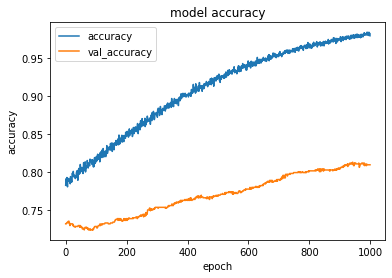

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

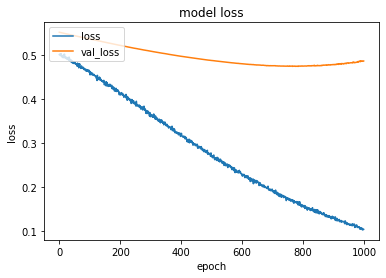

In [85]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()